In [1]:
# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

# 1. EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns)

In [2]:
cars_df = pd.read_csv("cars-dataset.csv")
#hp column in the cars data set has '?' values in it which needs to be imputed by either mean or median
cars_df = cars_df.replace(cars_df['hp']== '?', cars_df.median())
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [3]:
# Drop car name column as it is not required for model validation
cars_df = cars_df.drop(['car name'], axis = 1)
cars_df

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130,3504,12.0,70,18.0
1,8,350.0,165,3693,11.5,70,15.0
2,8,318.0,150,3436,11.0,70,18.0
3,8,304.0,150,3433,12.0,70,16.0
4,8,302.0,140,3449,10.5,70,17.0
5,8,429.0,198,4341,10.0,70,15.0
6,8,454.0,220,4354,9.0,70,14.0
7,8,440.0,215,4312,8.5,70,14.0
8,8,455.0,225,4425,10.0,70,14.0
9,8,390.0,190,3850,8.5,70,15.0


In [4]:
# Also 'hp' column's data type is to be converted to float
#cars_df['hp'] = cars_df['hp'].astype('float64')  
cars_df.loc[cars_df['hp'] == '?']

,cyl,disp,hp,wt,acc,yr,mpg
32,4,98.0,?,2046,19.0,71,25.0
126,6,200.0,?,2875,17.0,74,21.0
330,4,85.0,?,1835,17.3,80,40.9
336,4,140.0,?,2905,14.3,80,23.6
354,4,100.0,?,2320,15.8,81,34.5
374,4,151.0,?,3035,20.5,82,23.0


In [5]:
#cars_df.loc[cars_df['hp'] == '?']
cars_df = cars_df.replace('?','0')
#cars_df['hp']
cars_df[cars_df['hp'] == 0]


,cyl,disp,hp,wt,acc,yr,mpg


In [6]:
#cars_df = cars_df.replace(cars_df['hp']== '0', cars_df['hp'].median())
cars_df['hp'].replace(0, np.nan, inplace= True)
cars_df[cars_df['hp'] == 'nan']
median_value=cars_df['hp'].median()
cars_df['hp'] = cars_df['hp'].fillna(median_value)
cars_df['hp']

0      130
1      165
2      150
3      150
4      140
5      198
6      220
7      215
8      225
9      190
10     170
11     160
12     150
13     225
14      95
15      95
16      97
17      85
18      88
19      46
20      87
21      90
22      95
23     113
24      90
25     215
26     200
27     210
28     193
29      88
      ... 
368     88
369     88
370     85
371     84
372     90
373     92
374      0
375     74
376     68
377     68
378     63
379     70
380     88
381     75
382     70
383     67
384     67
385     67
386    110
387     85
388     92
389    112
390     96
391     84
392     90
393     86
394     52
395     84
396     79
397     82
Name: hp, Length: 398, dtype: object

In [7]:
cars_df['hp'] = cars_df['hp'].astype('float64')
cars_df.dtypes

cyl       int64
disp    float64
hp      float64
wt        int64
acc     float64
yr        int64
mpg     float64
dtype: object

In [8]:
cars_df.describe()

,cyl,disp,hp,wt,acc,yr,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,102.894472,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,40.269544,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,46.600000


# Q2 - Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points

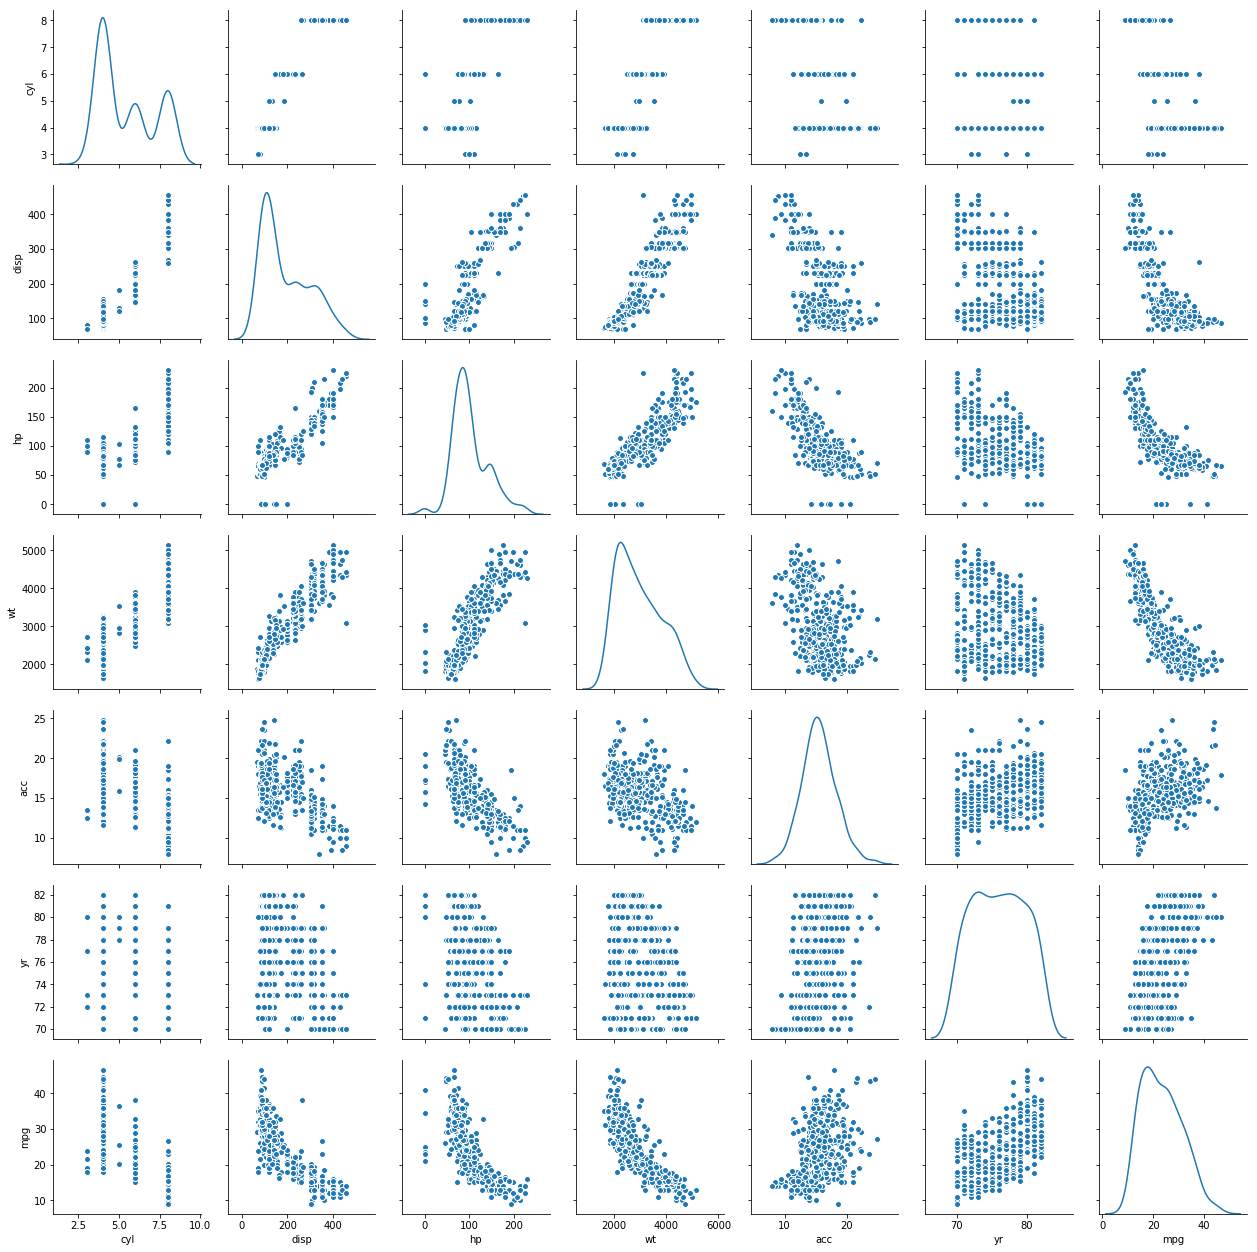

In [9]:
sns.pairplot(cars_df, diag_kind='kde') 

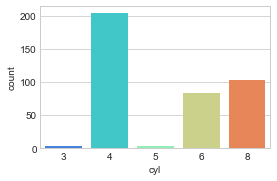

In [36]:
fig = plt.figure(figsize=(14,12))
sns.set_style('whitegrid')
plt.subplot2grid((4,3),(0,0))
sns.countplot(x='cyl',data=cars_df,palette='rainbow')
# Observations :-
# 1. Looks like there are 3 sharp clusters which is grouping 5 different cylinder types. Also there are more number of cars with 4 cylinders present in the data set
# 2.  Acceleration seems to follow a near normal distribution
# 3. Displacement, Horsepower and Weight follows a negative correlation against Mileage i.e. The more these values, the mileage decrases and vice-versa
# 4. Displacement and weight has quite a strong positive correlation

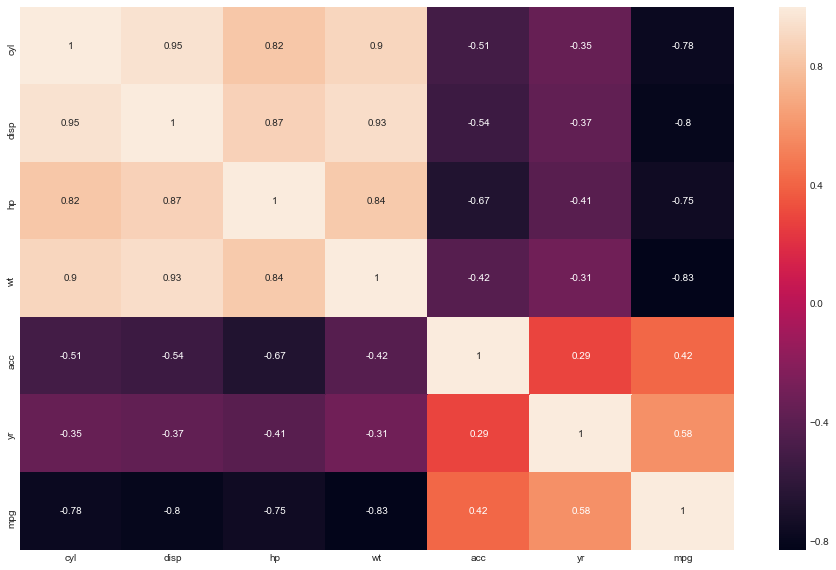

In [37]:
plt.figure(figsize=(16, 10))
sns.heatmap(cars_df.corr(), annot=True)

# Q3. Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)

In [54]:
# Assigning features and target variables

X = cars_df[cars_df.columns[1:-1]]
y = cars_df['mpg']

from scipy.stats import zscore

cars_df_z = cars_df.apply(zscore)

In [55]:
from sklearn.cluster import KMeans


# Let us check optimal number of clusters-


cluster_range = range( 1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(cars_df_z)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  


# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]




,num_clusters,cluster_errors
0,1,2786.000000
1,2,1306.300653
2,3,960.944848
3,4,752.860670
4,5,679.850429
5,6,619.025515
6,7,559.594224
7,8,513.952231
8,9,475.023874


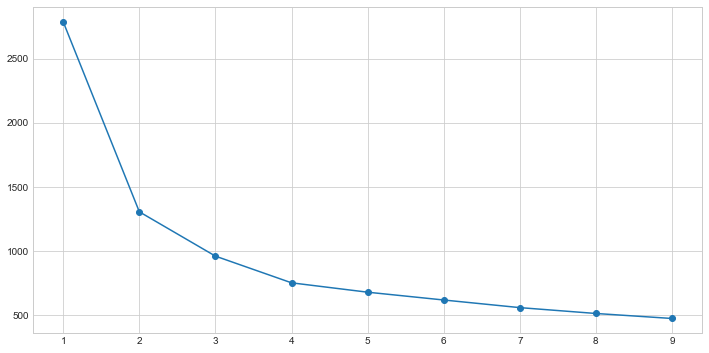

In [56]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [57]:
# 3 is the optimal number of clusters as per above elbpw plot

# Number of clusters

kmeans = KMeans(n_clusters=3)

# Fitting the input data

kmeans = kmeans.fit(cars_df_z)

# Getting the cluster labels

labels = kmeans.predict(cars_df_z)

# Centroid values

centroids = kmeans.cluster_centers_



# Comparing with scikit-learn centroids

print("Centroid values")


print("sklearn")

print(centroids) # From sci-kit learn

Centroid values
sklearn
[[-0.18845423 -0.18626141 -0.20059089 -0.10605661  0.26178428 -0.32731526
  -0.25479007]
 [ 1.4864187   1.46865697  1.43354232  1.36736404 -1.03371846 -0.61198576
  -1.12726026]
 [-0.8397395  -0.82964026 -0.7891694  -0.84641953  0.44037675  0.79056167
   1.07375547]]


In [47]:
# colnames = ["col1", "col2"]
# prediction= kmeans.predict(cars_df_z)
# #X["clusters"] = prediction
# X_df = pd.DataFrame(X, columns= colnames)
# X_df["group"] = prediction



In [48]:
# for i in cluster_range:
#     points = np.array(X_df.loc[X_df['group'] == i])
    
# points

array([], shape=(0, 3), dtype=float64)

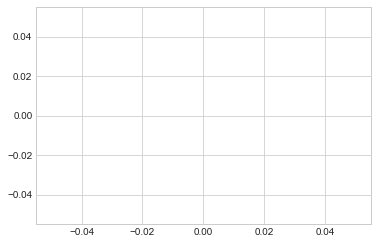

In [53]:
# colors = ['r', 'g', 'b', 'y', 'c', 'm']
# fig, ax = plt.subplots()
# c = np.array([3,3])

# for i in labels:
#         points = np.array(X_df.loc[X_df['group'] == i])
#         #c[i] = np.mean(points, axis=0)
#         ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])


In [58]:
centroid_df = pd.DataFrame(centroids, columns = list(cars_df_z) )
centroid_df

,cyl,disp,hp,wt,acc,yr,mpg
0,-0.188454,-0.186261,-0.200591,-0.106057,0.261784,-0.327315,-0.254790
1,1.486419,1.468657,1.433542,1.367364,-1.033718,-0.611986,-1.127260
2,-0.839740,-0.829640,-0.789169,-0.846420,0.440377,0.790562,1.073755


In [60]:
prediction=kmeans.predict(cars_df_z)
cars_df_z["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

In [61]:
cars_df_z.groupby("GROUP").count()

,cyl,disp,hp,wt,acc,yr,mpg
GROUP,,,,,,,
0,156,156,156,156,156,156,156
1,100,100,100,100,100,100,100
2,142,142,142,142,142,142,142


In [78]:
# colors = ['r', 'g', 'b', 'y', 'c', 'm']
# fig, ax = plt.subplots()
# c = np.array([3,3])

# for i in labels:
#         points = np.array(cars_df_z.loc[cars_df_z['GROUP'] == i])
#         #c[i] = np.mean(points, axis=0)
#         ax.scatter(points[:, 0], points[:, 1], s=5, c=colors[i])

#plt.scatter(cars_df_z['GROUP'], cars_df_z['mpg'])
# plt.scatter(cars_df_z[ : , 0], cars_df_z[ : , 1])

# plt.show()

# Q4) Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

In [127]:
from sklearn import model_selection

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(cars_df_z, y, test_size=test_size, random_state=seed)

In [128]:
# Let us build a linear regression model on the PCA dimensions 

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

regression_model.coef_

array([ 1.19929713e-15,  3.17162979e-15, -5.41544271e-16, -3.41970159e-15,
        1.33023445e-15,  2.39724783e-15,  7.80615906e+00, -4.83269094e-17])

In [129]:
regression_model.intercept_

23.514572864321607

In [130]:
regression_model.score(X_test, y_test)

1.0

In [131]:
X = cars_df[cars_df.columns[1:-1]]
y = cars_df['mpg']
for i in np.unique(cars_df_z['GROUP']):
    cars_df_z.loc[cars_df_z['GROUP']]== i
    X_train, X_test, y_train, y_test = model_selection.train_test_split(cars_df_z, y, test_size=test_size, random_state=seed) 
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)
    print(regression_model.coef_)


[ 1.19929713e-15  3.17162979e-15 -5.41544271e-16 -3.41970159e-15
  1.33023445e-15  2.39724783e-15  7.80615906e+00 -4.83269094e-17]
[ 1.19929713e-15  3.17162979e-15 -5.41544271e-16 -3.41970159e-15
  1.33023445e-15  2.39724783e-15  7.80615906e+00 -4.83269094e-17]
[ 1.19929713e-15  3.17162979e-15 -5.41544271e-16 -3.41970159e-15
  1.33023445e-15  2.39724783e-15  7.80615906e+00 -4.83269094e-17]
